# Part I - Ford GoBike System Data Exploration
## by Richmond Tetteh

## Introduction
> This document explores a Ford GoBike System dataset containing bike sharing data for approximately 183,412 customers.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

## Assessing Data

In [3]:
# high-level overview of data shape and composition
print(bike_data.shape)
print(bike_data.dtypes)
print(bike_data.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
bike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
bike_data.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [6]:
bike_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
103696,447,2019-02-14 11:31:51.0640,2019-02-14 11:39:18.7000,246.0,Berkeley Civic Center,37.869060,-122.270556,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,5455,Subscriber,1995.0,Female,No
94477,581,2019-02-15 16:20:33.5910,2019-02-15 16:30:14.7540,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5084,Subscriber,1973.0,Female,No
105613,208,2019-02-13 22:09:11.5540,2019-02-13 22:12:40.1670,243.0,Bancroft Way at College Ave,37.869360,-122.254337,267.0,Derby St at College Ave,37.861804,-122.253569,4605,Subscriber,1998.0,Male,Yes
25984,178,2019-02-25 14:57:50.0030,2019-02-25 15:00:48.8390,25.0,Howard St at 2nd St,37.787522,-122.397405,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5229,Subscriber,1975.0,Male,No
100471,695,2019-02-14 18:17:35.2250,2019-02-14 18:29:10.8190,81.0,Berry St at 4th St,37.775880,-122.393170,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,4648,Customer,1992.0,Male,No


In [7]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [9]:
type(bike_data['bike_share_for_all_trip'][0])

str

In [10]:
bike_data.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
sum(bike_data.member_gender.isnull())

8265

In [12]:
bike_data.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [13]:
sum(bike_data.user_type.isnull())

0

In [14]:
sum(bike_data.duration_sec.isnull())

0

In [15]:
sum(bike_data.start_station_name.isnull())

197

In [16]:
sum(bike_data.member_birth_year.isnull())

8265

In [17]:
sum(bike_data.end_time.isnull())

0

## Quality issues
bike_data table
Rating denominator has values less than 10

1. NaN values in Data to be removed (member_gender, member_birth_year and start_station_name columns)

2. Erroneous datatypes (start_time and end_time)

## Cleaning Data

In [18]:
# Make copies of original pieces of data
bike_data_clean = bike_data.copy()

## Issue #1: NaN values in Data to be removed (member_gender, member_birth_year and start_station_name columns)

#### Define: 
Remove the rows that have have associating NaN values in the member_gender, member_birth_year and start_station_name  columns.

#### Code

In [19]:
bike_data_clean = bike_data_clean.dropna().reset_index(drop=True)

#### Test

In [20]:
bike_data_clean.start_station_name.isna().value_counts()

False    174952
Name: start_station_name, dtype: int64

In [21]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


## Issue #2: Erroneous datatypes (start_time and end_time)

#### Define:
Convert start_time and end_time to datatype integer

#### Code

In [22]:
# To datatime
bike_data_clean.start_time = pd.to_datetime(bike_data_clean.start_time)

In [23]:
bike_data_clean.end_time = pd.to_datetime(bike_data_clean.end_time)

#### Test

In [24]:
#start_time and end_time should be in datetime
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "bike_archive_master.csv"

In [25]:
bike_data_clean.to_csv('bike_archive_master', index = False)

In [26]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike_archive_master')

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 21.4+ MB


### What is the structure of your dataset?

> There were initially 183,412 entries in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender  and bike_share_for_all_trip) but after assessing and cleaning my dataset there are 174952 entries with 16 features in the dataset. Most variables are numeric in nature, but the variables start_time, end_time, start_station_name, end_station_name, member_gender and bike_share_for_all_trip are non-numeric.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out the factors that determine or influence individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that duration_sec, user_type and member_gender will have the main effect on individual rides made in the bike-sharing system of the dataset. I also think that bike_share_for_all_trip will have effects on the individual rides made in the bike-sharing system, though to a much smaller degree than the main effect of duration_sec, user_type and member_gender respectively.

## Univariate Exploration

>I will start by looking at the distribution of the my main variable of interest: duration. Is the distribution skewed or symmetric? Is it unimodal or multimodal? 

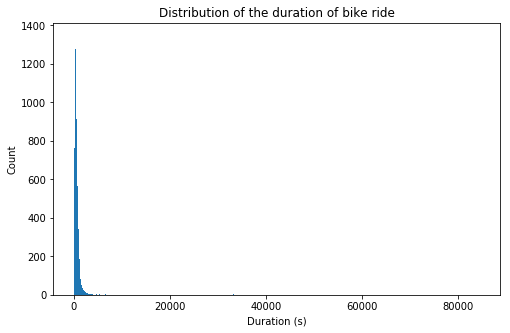

In [28]:
# start with a standard-scaled plot
binsize = 5
bins = np.arange(0, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins);
plt.title('Distribution of the duration of bike ride')
plt.xlabel('Duration (s)')
plt.ylabel('Count')

plt.show()

####  I performed log scaling of duration before plotting again.

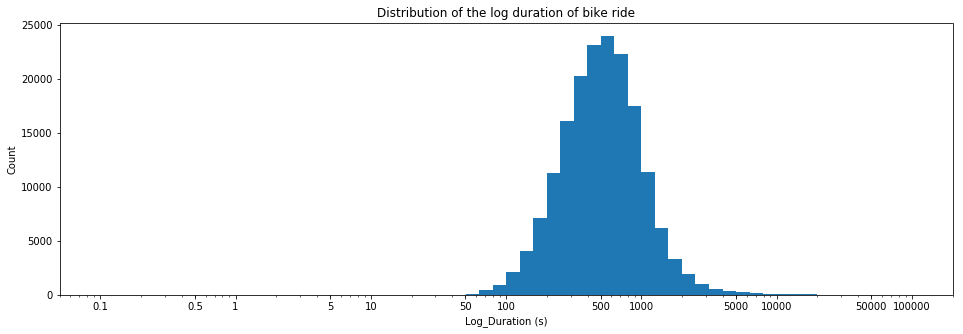

In [29]:
plt.figure(figsize=[16,5])
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 5+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000,5000,10000,50000,100000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=bike, x='duration_sec', bins=bins);
plt.title('Distribution of the log duration of bike ride')
plt.xlabel('Log_Duration (s)')
plt.ylabel('Count')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

## Now let's move on to exploring the other three categorical variables; user_type, member_ gender and bike_share_for_ all_ trip. For each of these variables does the data tend to you have a higher number or lower number in terms of the patronage of individual ridesmade in the bike sharing system?

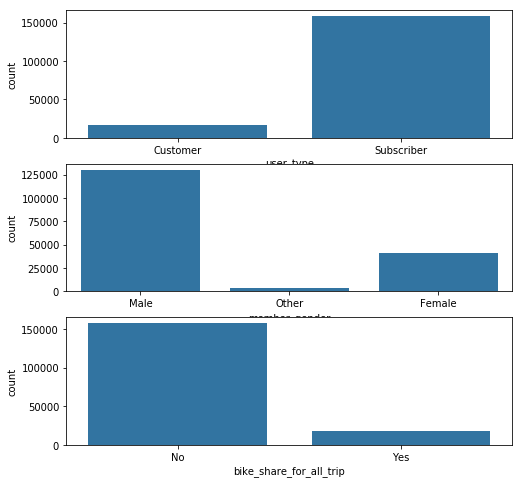

In [30]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sb.color_palette()[0]

sb.countplot(data = bike, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = bike, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = bike, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration distribution comment:I created a histogram chart for duration since it is a numeric variable. The initial plot shows that duration follows a highly skewed distribution. This called for a need of log scaling.
> Duration distribution comment (log scaling): Under a log scale, I observed that the data for the duration is roughly unimodal with a large peak somewhere between 400 and 600. The duration distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> General categorical feature comment: I produced bad chart for all of the variables the because the datas are categorical.

>User_type distribution: The bar chart shows that subscribers have the highest number of count making use of the bike sharing system while the customer type had the lowest number of count of users using the bike sharing system.

>Member_gender distribution: The bar chart shows that the male gender have the highest number of count making use of the bike sharing system followed by the female gender with a relatively smaller count of users using the bike sharing system. The other gender had the lowest number of count of users using the bike sharing system.

>Bike_share_for_all_trip distribution: The bar chart shows that the answer No has the highest number of count of individuals who refused to share their bike for all trip while using the bike sharing system while the answer Yes had the lowest number of count of individuals who shared thier bike for all trip while using the bike sharing system.



## Bivariate Exploration

> In this section, I investigated the relationships between pairs of variables in my data.

In [31]:
#I begun by categorizing the data types
numeric_vars = ['duration_sec']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

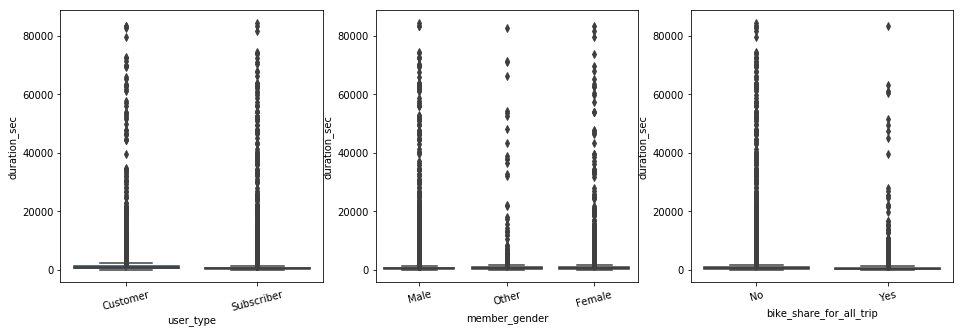

In [32]:
# THREE BOX PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: box plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.boxplot(data=bike, x='user_type', y='duration_sec', color=base_color);
plt.xticks(rotation=15);

# Middle plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=bike, x='member_gender', y='duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

# RIGHT plot: box plot
plt.subplot(1, 3, 3)
sb.boxplot(data=bike, x='bike_share_for_all_trip', y='duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

#### I then performed a log transformation of duration again and made a new plot.

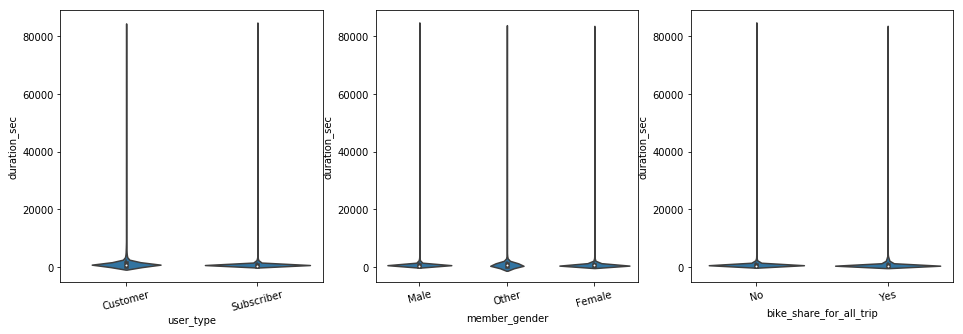

In [33]:
# THREE VIOLIN PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: box plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=bike, x='user_type', y='duration_sec', color=base_color);
plt.xticks(rotation=15);

# Middle plot: box plot
plt.subplot(1, 3, 2)
sb.violinplot(data=bike, x='member_gender', y='duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

# RIGHT plot: box plot
plt.subplot(1, 3, 3)
sb.violinplot(data=bike, x='bike_share_for_all_trip', y='duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

In [34]:
# I then performed a log transformation of duration again and made a new plot.
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

bike['log_duration_sec'] = bike['duration_sec'].apply(log_trans)

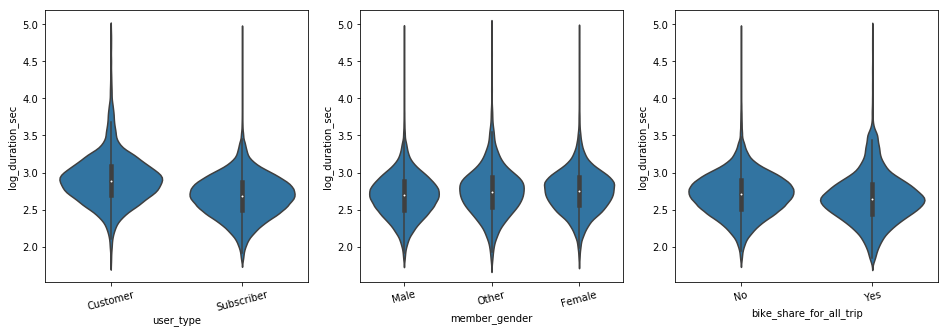

In [35]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: box plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=bike, x='user_type', y='log_duration_sec', color=base_color);
plt.xticks(rotation=15);

# Middle plot: box plot
plt.subplot(1, 3, 2)
sb.violinplot(data=bike, x='member_gender', y='log_duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

# RIGHT plot: box plot
plt.subplot(1, 3, 3)
sb.violinplot(data=bike, x='bike_share_for_all_trip', y='log_duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

#### Violin Plot:The violin plot shows the relationship of the categorical variables to the log transformation of duration.

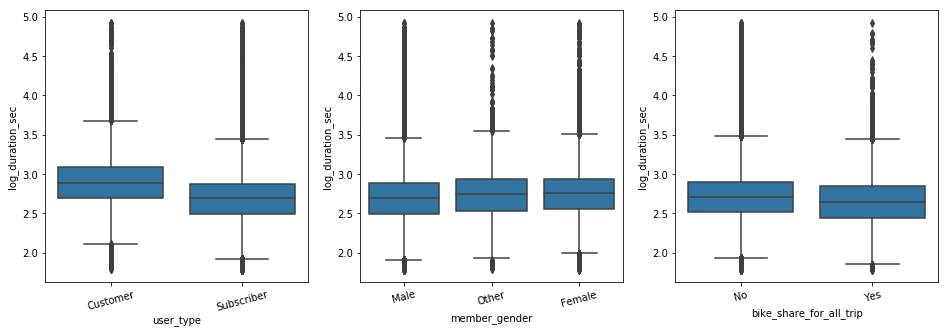

In [36]:
# THREE BOX PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: box plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.boxplot(data=bike, x='user_type', y='log_duration_sec', color=base_color);
plt.xticks(rotation=15);

# Middle plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=bike, x='member_gender', y='log_duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

# RIGHT plot: box plot
plt.subplot(1, 3, 3)
sb.boxplot(data=bike, x='bike_share_for_all_trip', y='log_duration_sec', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

#### The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots.

#### I will then look at the relationship between the three categorical variables.

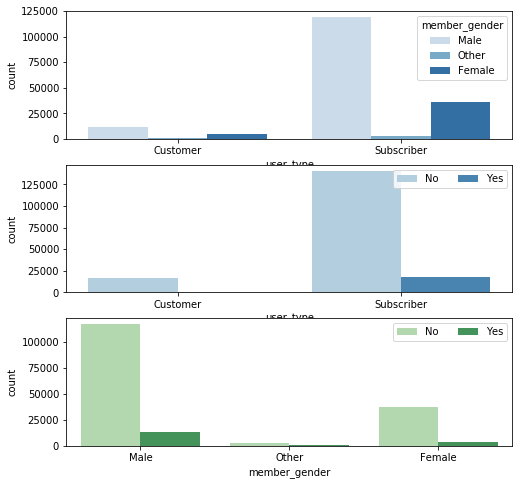

In [37]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: user_type vs member_gender
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: user_type vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member_gender vs. bike_share_for_all_trip, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration vs User_type: Interestingly it appears that there are no relationships between the categorical variables and the numeric value of interest which is duration. I then performed a log transformation of duration again and made a new plot.

> Log_duration vs User_type: The box plot elements show that the median log duration for subscribers is lower than that of the customers when compared with each other. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates that the duration of both the customer and subscriber are highly concentrated around the median. The subscriber has a more elongated distribution at one end while that of the customer has a more elongated distribution at both ends.

> Log_duration vs Member_gender: The box plot elements show that the median log duration for males is the lowest followed by that of the other gender and then than that of the female gender when compared with each other. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates that the duration for the male gender, other gender and female gender are highly concentrated around the median. The other gender has a more elongated distribution at one end which indicates that this particular gender had individuals recording a much higher duration while riding their bikes.

> Log_duration vs Bike_share_for_all_trip: The box plot elements show that the median log duration for the answer Yes is lower than that of the No when compared with each other. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates that the duration of both the Yes and No are highly concentrated around the median. They both have a more elongated distribution at one end.

> Box plot: The box plots are relatively short, that means that the data is more compact and they do have some outliers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> User_type vs Member_gender: I observed that the subscribers have the most members with the highest count spread across the various genders. The male gender is the most dominating gender by count or frequency for both the user types followed by the female gender and the other gender.

> User_type vs Bike_share_for_all_trip: I observed that for the customer type all of the customers do not share thier ride for all trips while it is also observed that most subscriber members also do not share their rides but the difference is that a few subscriber members do share their ride for all trips.

> Bike_share_for_all_trip vs  Member_gender: I observed in this plot that majority of the three classified genders do not share their bikes for all trips. The male gender has a count of over 100,000 members who do not share their ride and a count lesss than 25,000 for those who share their ride.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between duration.

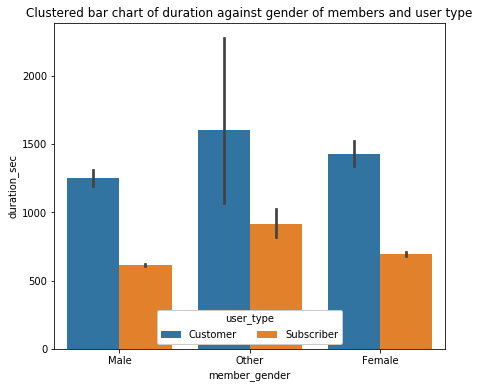

In [38]:
# A clustered bar chart
plt.figure(figsize = [7,6])
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
ax.legend(loc = 8, ncol = 7, framealpha = 1, title = 'user_type');
plt.title('Clustered bar chart of duration against gender of members and user type');

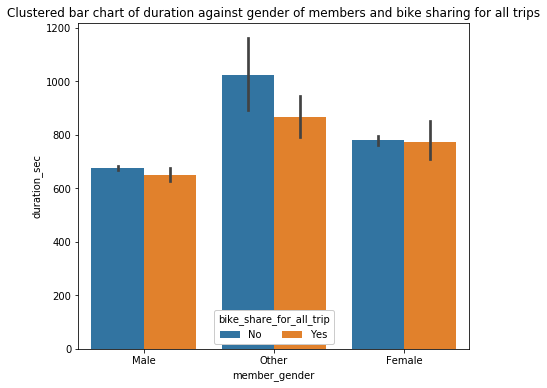

In [39]:
# A clustered bar chart
plt.figure(figsize = [7,6])
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip');
ax.legend(loc = 8, ncol = 7, framealpha = 1, title = 'bike_share_for_all_trip');
plt.title('Clustered bar chart of duration against gender of members and bike sharing for all trips');

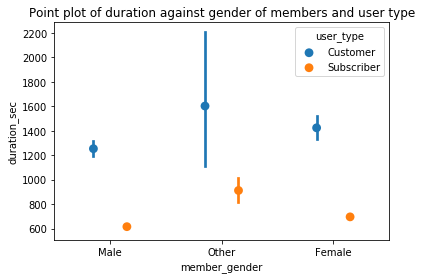

In [40]:
ax = sb.pointplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type',
                  dodge = 0.3, linestyles = "")
plt.title('Point plot of duration against gender of members and user type');

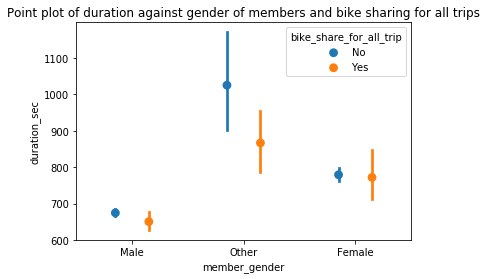

In [41]:
ax = sb.pointplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title('Point plot of duration against gender of members and bike sharing for all trips');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the bar plot of durations, user_type and member_gender; I observed that all the genders in the customer category that patronize the bike system record the highest number of duration riding their bike. 

> The other gender have the highest frequency or count for the duration recorded for both the customers and subscribers.

> It is also observed that the other gender has the highest frequency for the duration spent for riders who share their bike for all trip and those that do not share their bike for all trip. The male gender has the lowest frequency for both riders who share their bike for all trip and those that do not share their bike for all trip.

### Were there any interesting or surprising interactions between features?

> From the graph I observed that the three gender categories the highest number occuring frequency for those that do not share their ride for all trip is greater than those that do share their bike for all trip.

## Conclusions

> I first created a histogram chart for duration since it is a numeric variable. The initial plot shows that duration follows a highly skewed distribution. This called for a need of log scaling. I performed log scaling of duration before plotting again. Under a log scale, I observed that the data for the duration is roughly unimodal with a large peak somewhere between 400 and 600. The duration distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

> I moved on to explore the other three categorical variables; user_type, member_ gender and bike_share_for_ all_ trip. From the bar chart of the user_type distribution it shows that subscribers have the highest number of count making use of the bike sharing system while the customer type had the lowest number of count of users using the bike sharing system.The bar chart of the member_gender distribution shows that the male gender have the highest number of count making use of the bike sharing system followed by the female gender with a relatively smaller count of users using the bike sharing system. The other gender had the lowest number of count of users using the bike sharing system.The bar chart of the bike_share_for_all_trip distribution:shows that the answer No has the highest number of count of individuals who refused to share their bike for all trip while using the bike sharing system while the answer Yes had the lowest number of count of individuals who shared thier bike for all trip while using the bike sharing system.

> For the bivariate, I investigated the relationships between pairs of variables in my data.  The initial plot of duration vs user_type showed that there appeared to beno relationships between the categorical variables and the numeric value of interest which is duration. I then performed a log transformation of duration again and made a new plot. For the violin plot of Log_duration vs User_type it showed that the box plot elements show that the median log duration for subscribers is lower than that of the customers when compared with each other. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates that the duration of both the customer and subscriber are highly concentrated around the median. The subscriber has a more elongated distribution at one end while that of the customer has a more elongated distribution at both ends. For the violin plot of Log_duration vs Member_gender it showed that the box plot elements show that the median log duration for males is the lowest followed by that of the other gender and then than that of the female gender when compared with each other. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates that the duration for the male gender, other gender and female gender are highly concentrated around the median. The other gender has a more elongated distribution at one end which indicates that this particular gender had individuals recording a much higher duration while riding their bikes. For the violin plot of Log_duration vs Bike_share_for_all_trip it showed that the box plot elements show that the median log duration for the answer Yes is lower than that of the No when compared with each other. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates that the duration of both the Yes and No are highly concentrated around the median. They both have a more elongated distribution at one end. The box plots of the Log_duration vs categorical variables indicate that the box elements are relatively short, that means that the data is more compact and they do have some outliers. The plot of the full data using a violin plot and variable transformation of the duration reveals much more than the earlier box plots.

> I then proceeded to look at the relationship between the three categorical variables on bivariate plots. From the bar plot of user_type vs member_gender, I observed that the subscribers have the most members with the highest count spread across the various genders. The male gender is the most dominating gender by count or frequency for both the user types followed by the female gender and the other gender. From the bar plot of user_type vs bike_share_for_all_trip; I observed that for the customer type all of the customers do not share thier ride for all trips while it is also observed that most subscriber members also do not share their rides but the difference is that a few subscriber members do share their ride for all trips. From the bar plot of bike_share_for_all_trip vs  member_gender; I observed in this plot that majority of the three classified genders do not share their bikes for all trips. The male gender has a count of over 100,000 members who do not share their ride and a count lesss than 25,000 for those who share their ride.

> I then went on to explore the three categorical variables and their relationship with duration using multivariate exploration. From the bar plot of durations, user_type and member_gender; I observed that all the genders in the customer category that patronize the bike system record the highest number of duration riding their bike. The other gender have the highest frequency or count for the duration recorded for both the customers and subscribers.From the bar plot of durations,  member_gender and bike_share_for_all_trip; It is also observed that the other gender has the highest frequency for the duration spent for riders who share their bike for all trip and those that do not share their bike for all trip. The male gender has the lowest frequency for both riders who share their bike for all trip and those that do not share their bike for all trip.

> From the graph I observed that the three gender categories the highest number occuring frequency for those that do not share their ride for all trip is greater than those that do share their bike for all trip.

